# Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 

# Imported libraries and understanding data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [17]:
df = pd.read_csv("Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [18]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Preparation
* In this dataset there are many column with yes no value
* we need to convert this data into numerical value

In [20]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [21]:
df["mainroad"] = df["mainroad"].map({"yes":1,"no":0})
df["guestroom"] = df["guestroom"].map({"yes":1,"no":0})
df["basement"] = df["basement"].map({"yes":1,"no":0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1,"no":0})
df["airconditioning"] = df["airconditioning"].map({"yes":1,"no":0})
df["prefarea"] = df["prefarea"].map({"yes":1,"no":0})

In [22]:
status = pd.get_dummies(df["furnishingstatus"],drop_first = True)
status.head(2)

,semi-furnished,unfurnished
0,0,0
1,0,0


In [23]:
df = pd.concat([df,status],axis = 1)

In [24]:
df.drop(["furnishingstatus"],axis = 1,inplace = True)

# Normalize the data

In [25]:
def norm(x):
    return (x- np.min(x))/((max(x)-min(x)))

df = df.apply(norm)

# split the data 

In [26]:
X = df.drop(["price"],axis = 1)
y = df["price"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 22)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reg_model.score(X_test,y_test)

0.6297454171116068

In [31]:
#check the coeffient for independent variable

reg_pred = reg_model.predict(X_test)

In [43]:
var = df.drop(["price"],axis = 1)
var.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [52]:
ds_co = pd.DataFrame({"variable":var.columns,"coefficient":reg_model.coef_})
ds_co

,variable,coefficient
0,area,0.287359
1,bedrooms,0.029848
2,bathrooms,0.267501
3,stories,0.117395
4,mainroad,0.036826
5,guestroom,0.032053
6,basement,0.023709
7,hotwaterheating,0.080477
8,airconditioning,0.083666
9,parking,0.070080


<Figure size 720x576 with 0 Axes>

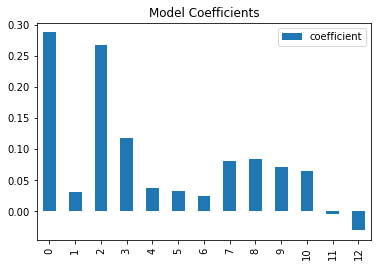

In [55]:
##checking the magnitude of coefficients
plt.figure(figsize=(10,8))
 
ds_co.plot(kind='bar', title='Model Coefficients')
plt.show()


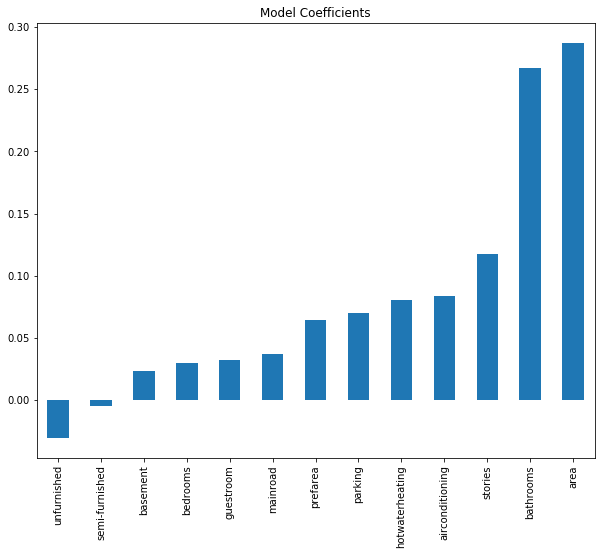

In [57]:
from pandas import Series
predictors = var.columns
 
coef = Series(reg_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

* Variables showing positive effect on regression model are area,bathrooms,stories,airconditioning,hotwaterheating,parking,prefarea,mainroad,guestroom,bedrooms,basement.

* Higher the value of beta coefficient, higher is the impact.
* Variable showing Negative effect on regression model are semi-furnished,unfurnished

# Ridge Model

In [58]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge_model.score(X_test,y_test)

0.6271571478024807

In [61]:
#initialize
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
ridge_df = pd.DataFrame({"variable":var.columns,"estimate":ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0,200,1)

for alpha in alphas:
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(X_train,y_train)
    var_name = "estimate" + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    
    #prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
    
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()

In [62]:
ridge_df

,variable,estimate,estimate0,estimate1,estimate2,estimate3,estimate4,estimate5,estimate6,estimate7,...,estimate190,estimate191,estimate192,estimate193,estimate194,estimate195,estimate196,estimate197,estimate198,estimate199
0,area,0.254756,0.287359,0.254756,0.229641,0.209632,0.193274,0.179623,0.168041,0.158075,...,0.020107,0.020023,0.019940,0.019857,0.019775,0.019694,0.019613,0.019533,0.019454,0.019375
1,bedrooms,0.038962,0.029848,0.038962,0.044332,0.047541,0.049432,0.050482,0.050979,0.051104,...,0.013017,0.012965,0.012914,0.012863,0.012812,0.012762,0.012713,0.012664,0.012615,0.012566
2,bathrooms,0.246502,0.267501,0.246502,0.229107,0.214397,0.201754,0.190747,0.181059,0.172455,...,0.023594,0.023492,0.023392,0.023292,0.023194,0.023096,0.022999,0.022902,0.022807,0.022712
3,stories,0.115445,0.117395,0.115445,0.113922,0.112564,0.111263,0.109974,0.108682,0.107382,...,0.029692,0.029577,0.029463,0.029350,0.029238,0.029127,0.029017,0.028907,0.028799,0.028691
4,mainroad,0.039133,0.036826,0.039133,0.040734,0.041885,0.042732,0.043362,0.043833,0.044182,...,0.020934,0.020865,0.020797,0.020729,0.020662,0.020595,0.020528,0.020462,0.020397,0.020332
5,guestroom,0.033998,0.032053,0.033998,0.035489,0.036659,0.037592,0.038345,0.038955,0.039451,...,0.021643,0.021578,0.021512,0.021447,0.021382,0.021318,0.021254,0.021191,0.021127,0.021065
6,basement,0.022514,0.023709,0.022514,0.021687,0.021083,0.020621,0.020257,0.019962,0.019716,...,0.012224,0.012196,0.012168,0.012140,0.012112,0.012085,0.012057,0.012030,0.012002,0.011975
7,hotwaterheating,0.076438,0.080477,0.076438,0.072830,0.069569,0.066597,0.063873,0.061363,0.059042,...,0.006608,0.006574,0.006540,0.006507,0.006474,0.006441,0.006409,0.006377,0.006345,0.006314
8,airconditioning,0.085165,0.083666,0.085165,0.086253,0.087055,0.087648,0.088081,0.088388,0.088596,...,0.044076,0.043939,0.043802,0.043667,0.043532,0.043399,0.043266,0.043133,0.043002,0.042872
9,parking,0.073367,0.070080,0.073367,0.075538,0.076930,0.077768,0.078200,0.078332,0.078240,...,0.024303,0.024212,0.024122,0.024032,0.023944,0.023856,0.023768,0.023681,0.023595,0.023510


# Analysis

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

#r_squared for training set
ridge_r2_train = [r2_score(y_train,p) for p in ridge_train_pred]

#r_squared for testing set
ridge_r2_test = [r2_score(y_test,p) for p in ridge_test_pred]

#lin reg r2 score
reg_r2 = r2_score(y_test,reg_pred)

Text(0, 0.5, 'R_square')

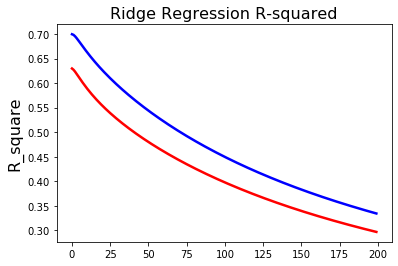

In [76]:
fig = plt.figure()
plt.plot(ridge_r2_train,"b",ridge_r2_test,"r",linewidth = 2.5,linestyle = "-")
plt.title("Ridge Regression R-squared", fontsize=16)
plt.ylabel("R_square",fontsize = 16)

In [77]:
# MSE for traing set
ridge_mse_train = [mean_squared_error(y_train, p) for p in ridge_train_pred]

#MSE for testing set
ridge_mse_test = [mean_squared_error(y_train, p) for p in ridge_train_pred]


Text(0, 0.5, 'MSE')

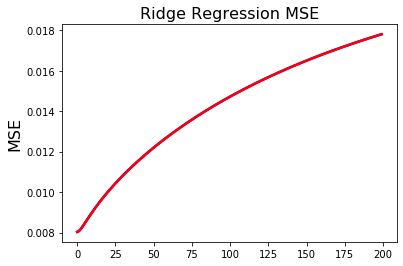

In [79]:
fig = plt.figure()
plt.plot(ridge_mse_train,"b",ridge_mse_test,"r",linewidth = 2.5,linestyle = "-")
plt.title("Ridge Regression MSE", fontsize=16)
plt.ylabel("MSE",fontsize = 16)

# Finding Best Fit Lambda
* Since we now understand how it works, it would be wise to use libraries already built. We can think of GridSearchCV, judging from the pattern of problem that we should change values for a certain parameter, lambda here. In addition, there is another library called RidgeCV

# GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [83]:
# Parameter setup

param = {"alpha":np.arange(0.01,10,0.01)}

ridge_grid = GridSearchCV(Ridge(),param)
ridge_grid.fit(X_train,y_train)
ridge_grid_pred = ridge_grid.predict(X_test)

print(ridge_grid.best_estimator_)
print("\nR2 score :",r2_score(y_test,ridge_grid_pred))
print("MSE :",mean_squared_error(y_test,ridge_grid_pred))

Ridge(alpha=0.5800000000000001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 score : 0.6284606400167729
MSE : 0.009232342576132842


In [84]:
print(ridge_grid.best_score_)

0.661214468245757
